In [ ]:
#Edgar Moises Hernandez-Gonzalez
#16/11/19
#Clasificar RAW con CNN-1D + GRU

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPool1D, Flatten, GRU, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report

In [2]:
x_train = pd.read_csv("MI-EEG-RWE-A01T.csv", header=None)
x_test = pd.read_csv("MI-EEG-RWE-A01E.csv", header=None)
y_train = pd.read_csv("EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("EtiquetasA01E.csv", header=None)

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 66)
(288, 66)
(288, 1)
(288, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [6]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 1, 66, 1))
x_test = x_test.reshape((n_samples_test, 1, 66, 1))

print(x_train.shape)
print(x_test.shape)

(288, 1, 3, 22)
(288, 1, 3, 22)


In [35]:
model = Sequential()
model.add(TimeDistributed(Conv1D(8, 11, activation='relu'), input_shape=(None,66,1)))
#model.add(TimeDistributed(MaxPool1D(2)))
#model.add(TimeDistributed(Conv1D(16, 11, activation='relu')))
#model.add(TimeDistributed(MaxPool1D(2)))
#model.add(TimeDistributed(Conv1D(16, 11, activation='relu')))
#model.add(TimeDistributed(MaxPool1D(2)))
model.add(TimeDistributed(Flatten()))
model.add(GRU(16))
#model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_16 (TimeDis (None, None, 1, 8)        536       
_________________________________________________________________
time_distributed_17 (TimeDis (None, None, 8)           0         
_________________________________________________________________
gru_4 (GRU)                  (None, 16)                1200      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 68        
Total params: 1,804
Trainable params: 1,804
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
history = model.fit(x_train, y_train, epochs=20, batch_size=18, validation_data=(x_test, y_test))

Train on 288 samples, validate on 288 samples
Epoch 1/20
288/288 [==============================] - 1s 3ms/sample - loss: 1.3901 - acc: 0.2812 - val_loss: 1.3671 - val_acc: 0.2986
Epoch 2/20
288/288 [==============================] - 0s 437us/sample - loss: 1.3687 - acc: 0.2986 - val_loss: 1.3589 - val_acc: 0.3056
Epoch 3/20
288/288 [==============================] - 0s 408us/sample - loss: 1.3574 - acc: 0.3194 - val_loss: 1.3517 - val_acc: 0.3125
Epoch 4/20
288/288 [==============================] - 0s 464us/sample - loss: 1.3482 - acc: 0.3264 - val_loss: 1.3481 - val_acc: 0.3264
Epoch 5/20
288/288 [==============================] - 0s 465us/sample - loss: 1.3376 - acc: 0.3472 - val_loss: 1.3414 - val_acc: 0.3194
Epoch 6/20
288/288 [==============================] - 0s 459us/sample - loss: 1.3281 - acc: 0.3576 - val_loss: 1.3386 - val_acc: 0.3160
Epoch 7/20
288/288 [==============================] - 0s 542us/sample - loss: 1.3175 - acc: 0.3646 - val_loss: 1.3336 - val_acc: 0.3125
Epoc

In [23]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

288/288 [==============================] - 0s 90us/sample - loss: 1.0161 - acc: 0.5417
Test loss: 1.016074001789093
Test accuracy: 0.5416667


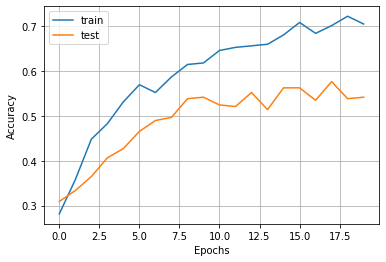

In [24]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

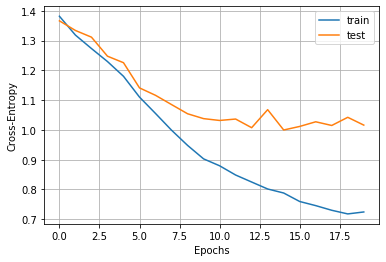

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend(['train', 'test'])
plt.show()

In [26]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [27]:
kappa = cohen_kappa_score(y_test, y_pred)
print(kappa)

0.38888888888888884


In [28]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[47 16  2  7]
 [34 34  3  1]
 [11  0 26 35]
 [ 7  2 14 49]]


In [29]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.47      0.65      0.55        72
           1       0.65      0.47      0.55        72
           2       0.58      0.36      0.44        72
           3       0.53      0.68      0.60        72

   micro avg       0.54      0.54      0.54       288
   macro avg       0.56      0.54      0.54       288
weighted avg       0.56      0.54      0.54       288

